# Solución PEC2

## Librerías

In [199]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline

## Carga de datos

In [340]:
# Carga de datos para los gráficos Bar plot y Ridgeline Chart
df = pd.read_csv(r"D:\MasterUOC\Clases\3er_Semestre\VisualizacionDatos\venv_view\BankDefaultAnalysis.csv").drop(columns=['exp_sf', 'linea_sf', 'deuda_sf'])

In [341]:
# Revisión de nulos
df.isna().sum() 

mora            0
atraso          0
vivienda        0
edad            0
dias_lab        0
nivel_ahorro    0
ingreso         0
score           0
zona            0
clasif_sbs      0
nivel_educ      0
dtype: int64

In [342]:
# Revisión del tipo de datos
df.dtypes

mora              int64
atraso            int64
vivienda         object
edad              int64
dias_lab          int64
nivel_ahorro      int64
ingreso         float64
score             int64
zona             object
clasif_sbs        int64
nivel_educ       object
dtype: object

## Visualización de datos

### Gráfico de barras (Bar Plot)

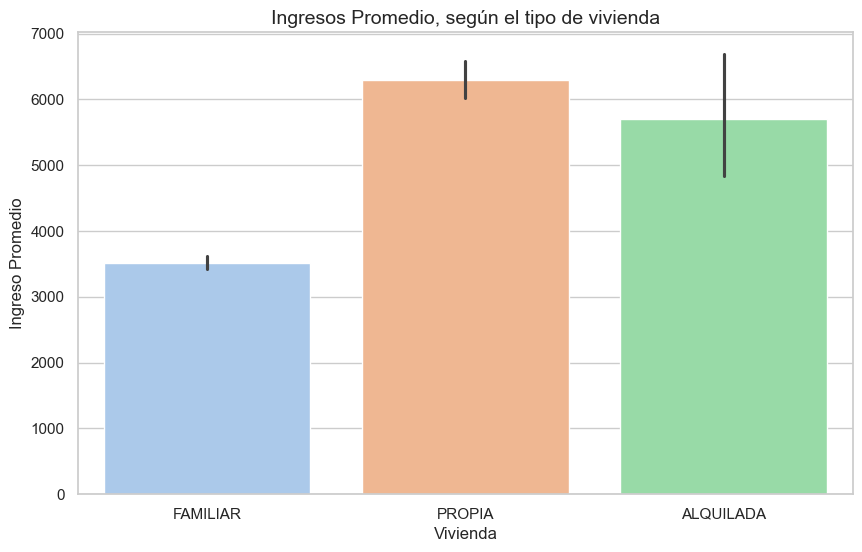

In [347]:
# Configurar estilo y contexto de Seaborn
sns.set(style="whitegrid")

# Crear gráfico de barras (barplot) con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='vivienda', y='ingreso', data=df, hue='vivienda', palette='pastel', estimator=np.mean)
plt.title('Ingresos Promedio, según el tipo de vivienda', fontsize=14)
plt.xlabel('Vivienda', fontsize=12)
plt.ylabel('Ingreso Promedio', fontsize=12)
plt.savefig(r'D:\MasterUOC\Clases\3er_Semestre\VisualizacionDatos\venv_view\Graph\BarChart.png', dpi=300, bbox_inches='tight')
plt.show()

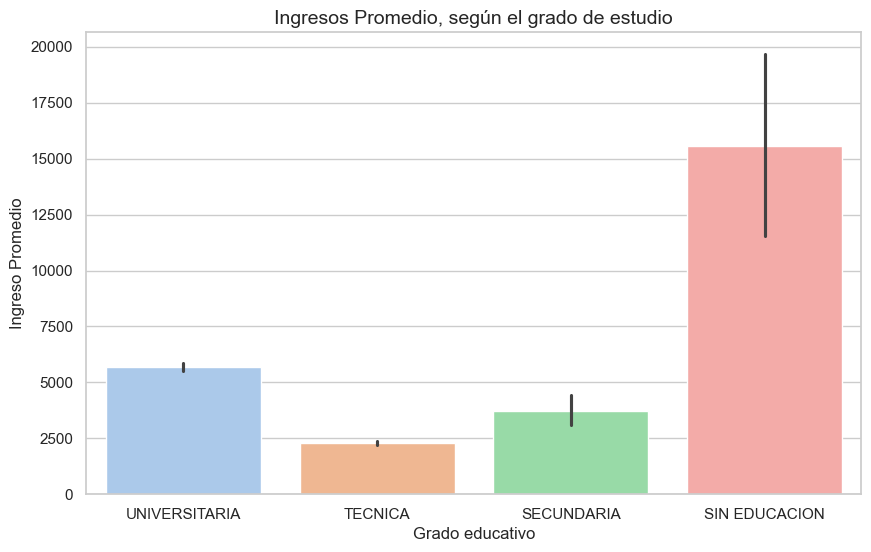

In [78]:
# Configurar estilo y contexto de Seaborn
sns.set(style="whitegrid")

# Crear gráfico de barras (barplot) con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='nivel_educ', y='ingreso', data=df, hue='nivel_educ', palette='pastel', estimator=np.mean)
plt.title('Ingresos Promedio, según el grado de estudio', fontsize=14)
plt.xlabel('Grado educativo', fontsize=12)
plt.ylabel('Ingreso Promedio', fontsize=12)
plt.show()

### Diagrama xarxa (Gráfico de redes)

In [344]:
df_xarxa = df.groupby(by = ['zona', 'nivel_educ'])['ingreso'].count().reset_index().rename(columns = {'ingreso': 'conexiones'})
df_xarxa_mod = df_xarxa[df_xarxa['conexiones'] > 100]

In [345]:
# Crear un grafo dirigido desde el DataFrame
G = nx.from_pandas_edgelist(df_xarxa_mod, 'zona', 'nivel_educ', edge_attr='conexiones', create_using=nx.DiGraph())

# Obtener posiciones de nodos en 3D (layout spring con dimensión 3)
pos = nx.spring_layout(G, dim=3)

# Crear la figura 3D
fig = go.Figure()

# Agregar nodos al trazado con etiquetas de texto
node_trace = go.Scatter3d(
    x=[pos[node][0] for node in G.nodes()],
    y=[pos[node][1] for node in G.nodes()],
    z=[pos[node][2] for node in G.nodes()],
    mode='markers+text',
    marker=dict(size=10, color='skyblue'),
    text=list(G.nodes()),
    textposition='top center'
)
fig.add_trace(node_trace)

# Agregar aristas al trazado con etiquetas de conexiones
for edge in G.edges():
    x0, y0, z0 = pos[edge[0]]
    x1, y1, z1 = pos[edge[1]]
    # Obtener etiqueta de conexión para la arista
    connection_label = f'\n{G.edges[edge]["conexiones"]}'
    # Calcular posición media para colocar la etiqueta
    x_mid = (x0 + x1) / 2
    y_mid = (y0 + y1) / 2
    z_mid = (z0 + z1) / 2
    edge_trace = go.Scatter3d(
        x=[x0, x1],
        y=[y0, y1],
        z=[z0, z1],
        mode='lines+text',
        line=dict(color='gray', width=2),
        hoverinfo='text',
        text=[connection_label],
        textposition='top center'
    )
    fig.add_trace(edge_trace)

# Configurar el diseño de la figura
fig.update_layout(
    title='Diagrama de Redes 3D con Etiquetas de Conexiones',
    width=1200,
    height=800,
    showlegend=False,
    scene=dict(
        xaxis=dict(title='X'),
        yaxis=dict(title='Y'),
        zaxis=dict(title='Z'),
    )
)

# Mostrar la figura interactiva
fig.show()

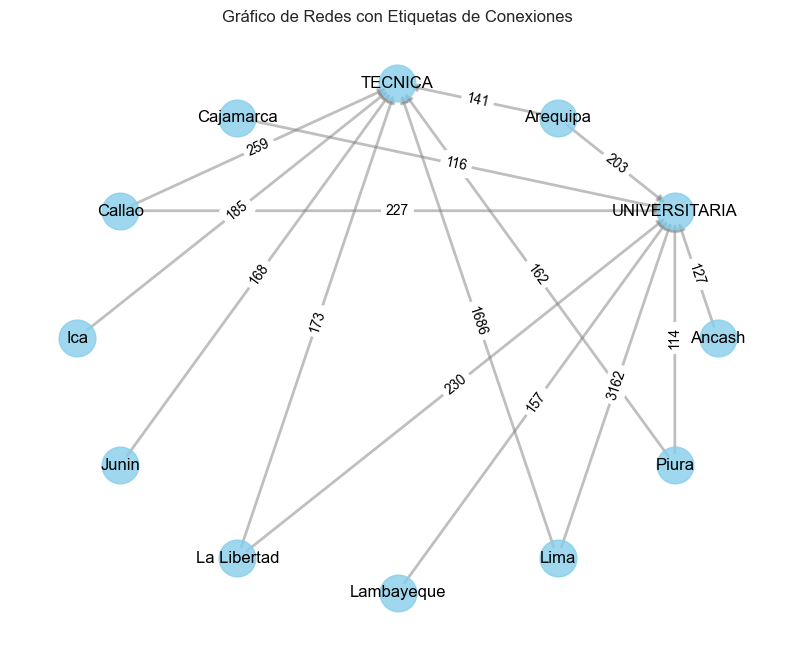

In [349]:
# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos y conexiones desde el DataFrame
for _, row in df_xarxa_mod.iterrows():
    nodo1 = row['zona']
    nodo2 = row['nivel_educ']
    conexiones = row['conexiones']
    
    # Agregar nodo y conexión
    G.add_edge(nodo1, nodo2, weight=conexiones)

# Dibujar el grafo
plt.figure(figsize=(10, 8))

# Posicionamiento de los nodos utilizando un layout circular
pos = nx.circular_layout(G)

# Dibujar nodos
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue', alpha=0.8)

# Dibujar bordes (con etiquetas de número de conexiones)
edges = G.edges()
edge_labels = {(n1, n2): G[n1][n2]['weight'] for (n1, n2) in edges}
nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, alpha=0.5, edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=10)

# Dibujar etiquetas de nodos
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black', font_family='sans-serif')

# Mostrar el grafo
plt.title('Gráfico de Redes con Etiquetas de Conexiones')
plt.axis('off')  # Ocultar ejes
plt.savefig(r'D:\MasterUOC\Clases\3er_Semestre\VisualizacionDatos\venv_view\Graph\Xarxar.png', dpi=300, bbox_inches='tight')
plt.show()

### Gráfico de Ridgeline Chart 

C:\Users\josel\AppData\Local\Temp\ipykernel_32964\53168558.py:20: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



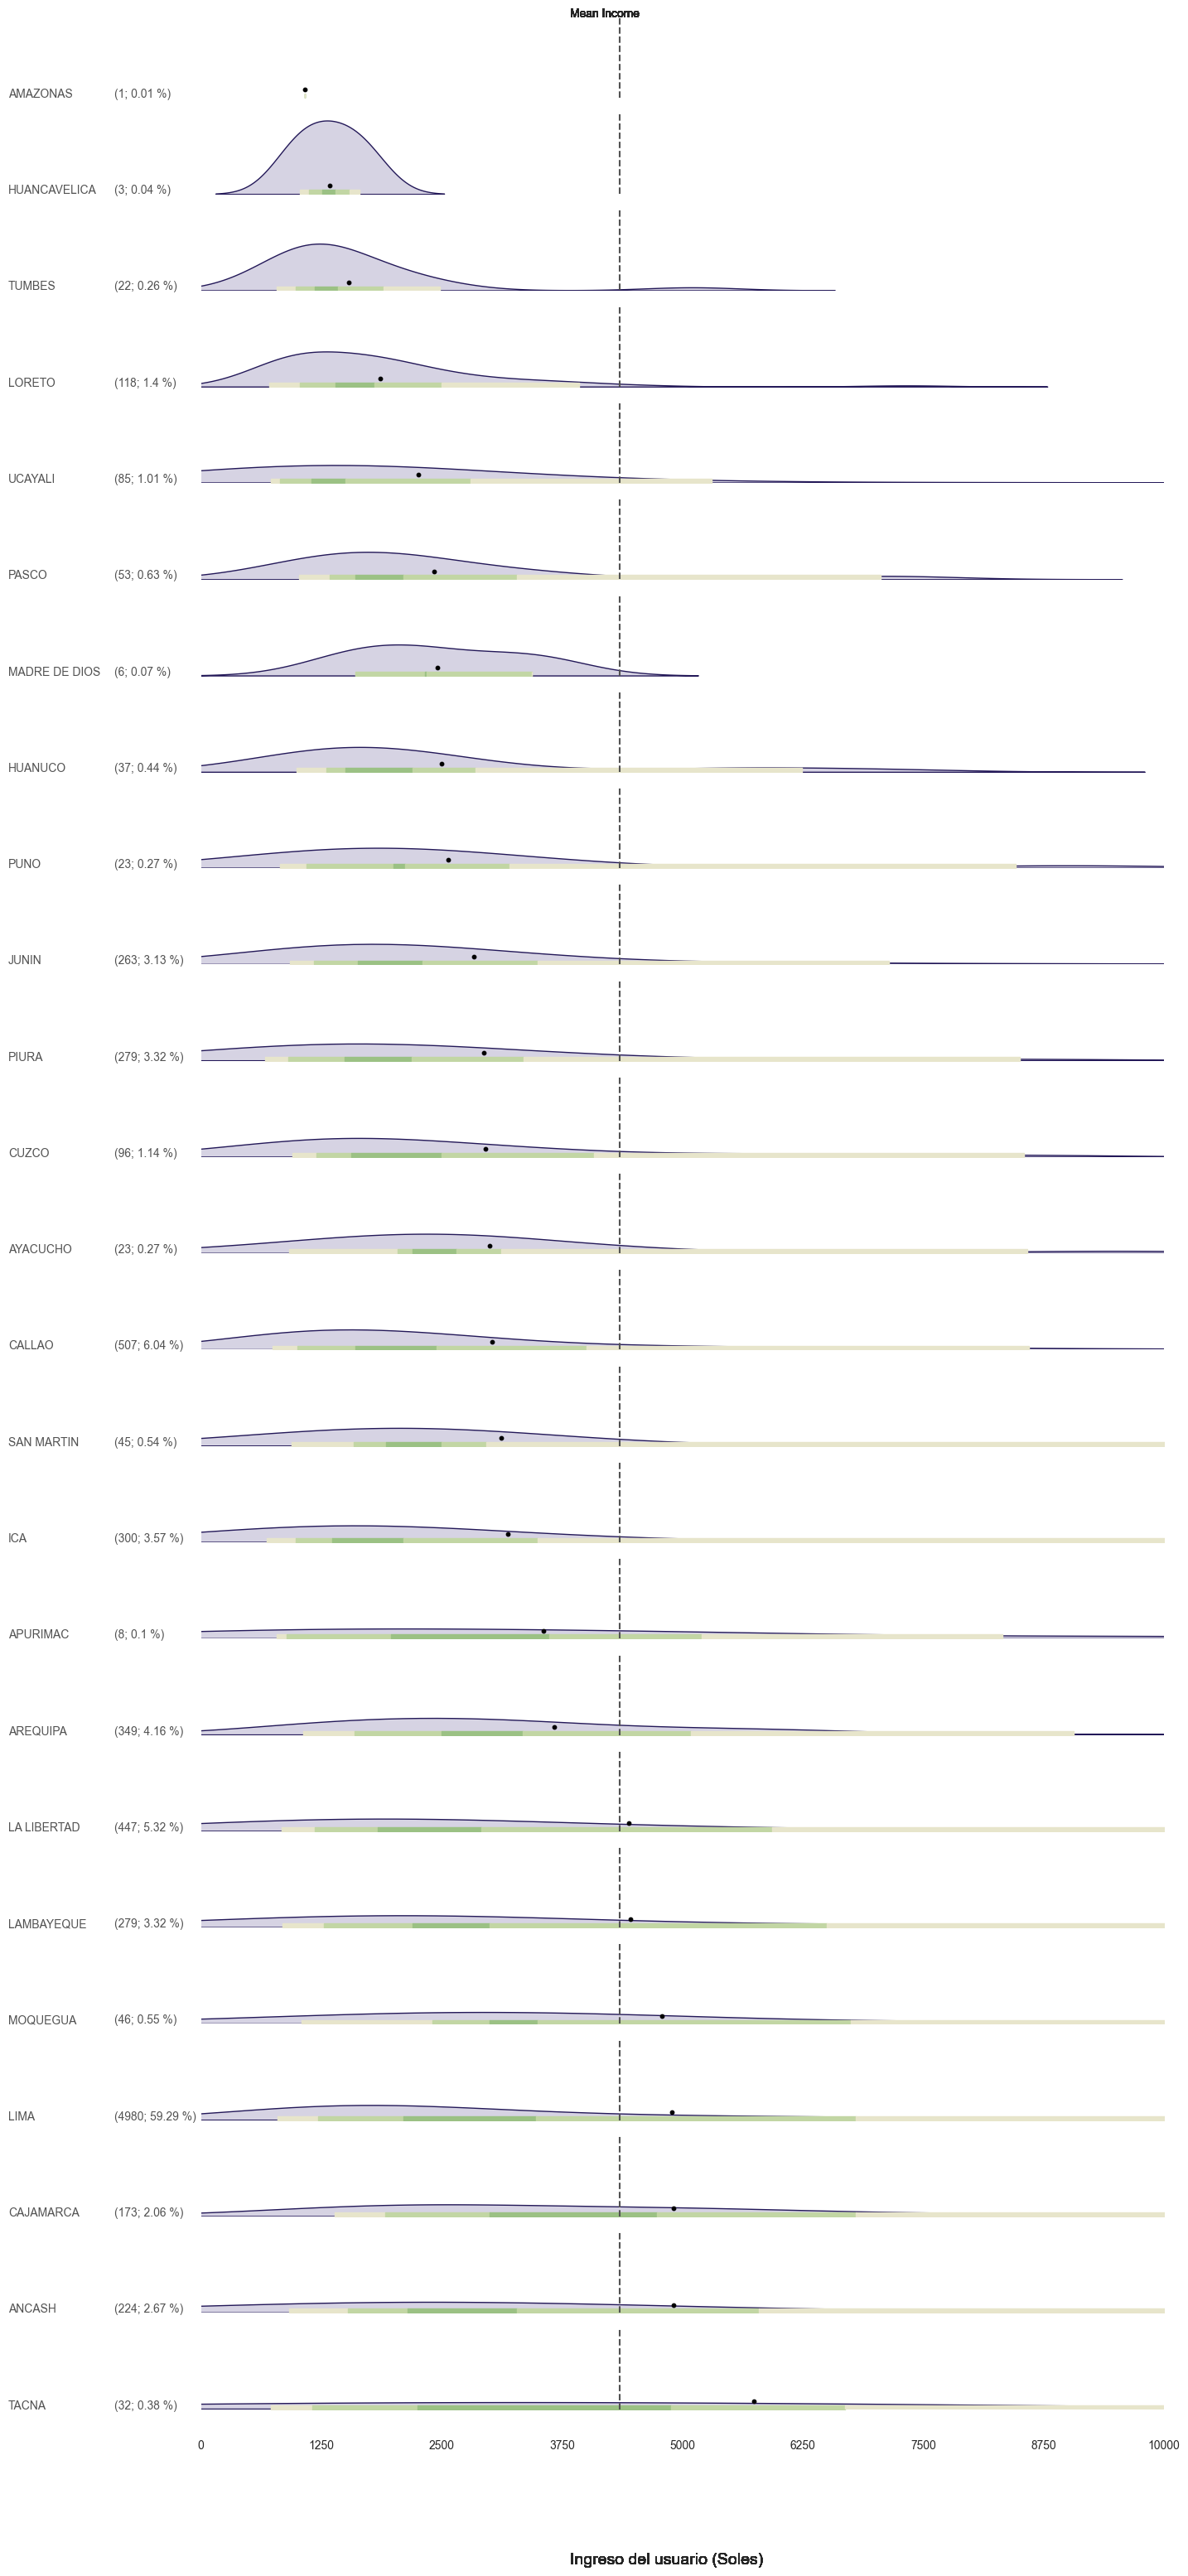

In [346]:
darkgreen = '#9BC184'
midgreen = '#C2D6A4'
lowgreen = '#E7E5CB'
colors = [lowgreen, midgreen, darkgreen, midgreen, lowgreen]

darkgrey = '#525252'

fig, axs = plt.subplots(nrows=25, ncols=1, figsize=(15, 37.5))
axs = axs.flatten() # needed to access each individual axis

# iterate over axes
words = df.groupby(by = ['zona'])['ingreso'].mean().reset_index().sort_values(by = 'ingreso')['zona'].tolist()

for i, word in enumerate(words):

    # subset the data for each word
    subset = df[df['zona'] == word]

    # plot the distribution of prices
    sns.kdeplot(
        subset['ingreso'],
        fill=True,
        ax=axs[i],
        color='#5D5393',
        edgecolor='#231858'
    )

    # global mean reference line
    global_mean = df['ingreso'].mean()
    axs[i].axvline(global_mean, color=darkgrey, linestyle='--')


    # display word on left
    axs[i].text(
        -2000, 0,
        word.upper(),
        ha='left',
        fontsize=10,
        # fontproperties=fira_sans_semibold,
        color=darkgrey
    )

    # Contabilización de registros
    df_count = df.groupby(by = ['zona'])['ingreso'].count().reset_index().sort_values(by = 'ingreso').rename(columns = {'ingreso': 'count'})
    df_count['prop'] = round((df_count['count'] / df_count['count'].sum())*100, 2)

    # display average number of bedrooms on left
    count = df_count[df_count['zona'] == word]['count'].values[0]
    proporcion = df_count[df_count['zona'] == word]['prop'].values[0]
    axs[i].text(
        -900, 0,
        f'({count}; {proporcion} %)',
        ha='left',
        fontsize=10,
        # fontproperties=fira_sans_regular,
        color=darkgrey
    )

    # compute quantiles
    quantiles = np.percentile(subset['ingreso'], [5, 20, 40, 60, 80, 95])
    quantiles = quantiles.tolist()

    # fill space between each pair of quantiles
    for j in range(len(quantiles) - 1):
        axs[i].fill_between(
            [quantiles[j], # lower bound
             quantiles[j+1]], # upper bound
            0, # max y=0
            0.00005, # max y=0.0002
            color=colors[j]
        )

    # mean value as a reference
    mean = subset['ingreso'].mean()
    axs[i].scatter([mean], [0.0001], color='black', s=10)

    # set title and labels
    axs[i].set_xlim(0, 10000)
    axs[i].set_ylim(0, 0.001)
    axs[i].set_ylabel('')

    # x axis scale for last ax
    if i == 24:
        values = [0, 1250, 2500, 3750, 5000, 6250, 7500, 8750, 10000]
        for value in values:
            axs[i].text(
                value, -0.0005,
                f'{value}',
                ha='center',
                fontsize=10
            )

    # x axis label
    text = "Ingreso del usuario (Soles)"
    fig.text(
        0.5, 0.06,
        text,
        ha='center',
        fontsize=14,
        # fontproperties=fira_sans_regular
    )

    # reference line label
    text = 'Mean Income'
    fig.text(
        0.45, 0.88,
        text,
        ha='center',
        fontsize=10
    )
    # remove axis
    axs[i].set_axis_off()

plt.savefig(r'D:\MasterUOC\Clases\3er_Semestre\VisualizacionDatos\venv_view\Graph\RidgelineChart.png', dpi=300, bbox_inches='tight')
plt.show()